In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  데이터 로드
df_fin = pd.read_csv('data/금융지표계산.csv')
df_real = pd.read_csv('data/실물지표계산.csv')
df_fin['date'] = pd.to_datetime(df_fin['날짜'])
df_real['date'] = pd.to_datetime(df_real['date'])

In [3]:
# 날짜 컬럼을 인덱스로 설정
df_fin = df_fin.set_index('date')
df_real = df_real.set_index('date')

In [4]:
# 데이터 병합 (동일 날짜 기준)
df = df_fin[['fin_index']].join(df_real[['real_index']], how='inner')

In [5]:
# Gap(괴리도) 계산 및 상/하위 10% 산출
df['gap'] = df['fin_index'] - df['real_index']
top_10 = df['gap'].quantile(0.90)
bot_10 = df['gap'].quantile(0.10)

In [6]:
# 국면 판정
df['top_regime'] = df['gap'] >= top_10
df['bottom_regime'] = df['gap'] <= bot_10

In [7]:
print(df_fin.head())

            Unnamed: 0          날짜  credit_spread     kospi  exchange  \
date                                                                    
2005-01-01          12  2005-01-01       0.498814  0.131148  1.437992   
2005-02-01          13  2005-02-01       0.544879  0.330123  1.716399   
2005-03-01          14  2005-03-01       0.529524  0.120029  1.278519   
2005-04-01          15  2005-04-01       0.498814 -0.064565  1.746783   
2005-05-01          16  2005-05-01       0.406682  0.588957  1.527302   

            fin_index  
date                   
2005-01-01   0.689318  
2005-02-01   0.863801  
2005-03-01   0.642691  
2005-04-01   0.727011  
2005-05-01   0.840981  


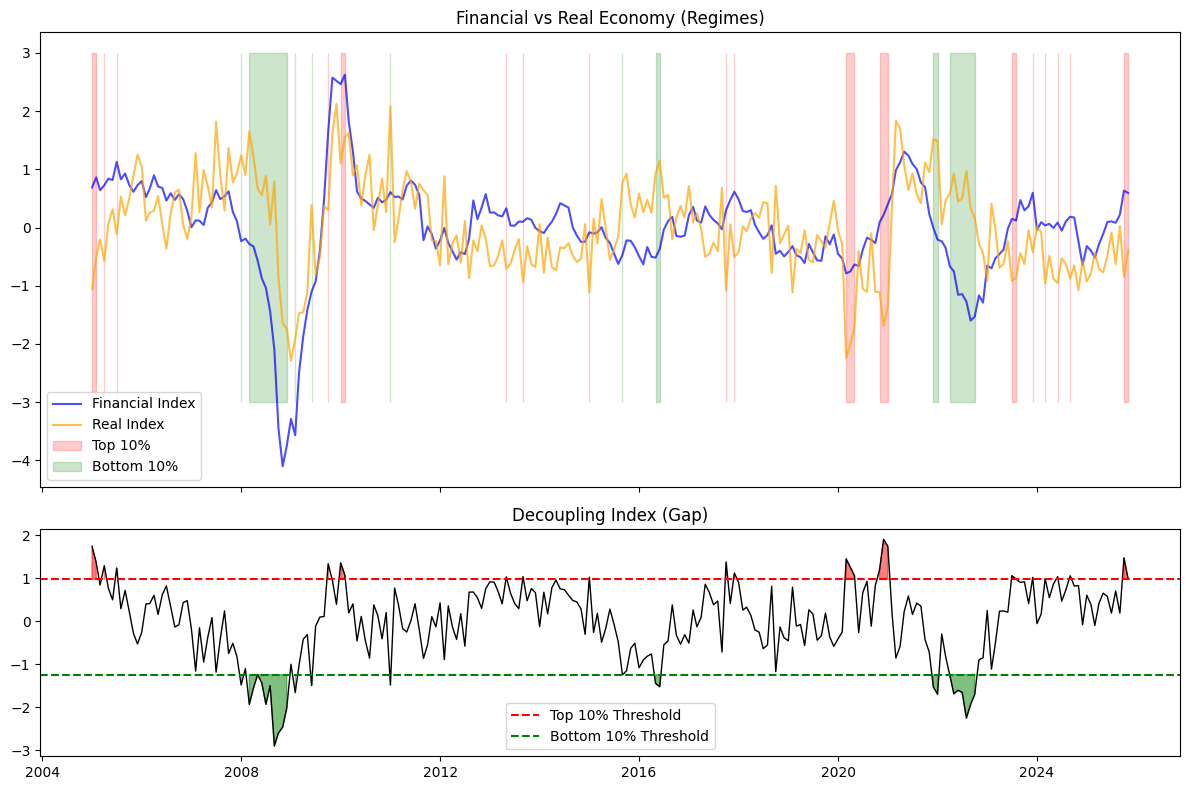

In [8]:
# 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# 상단: 두 지수 비교
ax1.plot(df.index, df['fin_index'], label='Financial Index', color='blue', alpha=0.7)
ax1.plot(df.index, df['real_index'], label='Real Index', color='orange', alpha=0.7)
ax1.fill_between(df.index, -3, 3, where=df['top_regime'], color='red', alpha=0.2, label='Top 10%')
ax1.fill_between(df.index, -3, 3, where=df['bottom_regime'], color='green', alpha=0.2, label='Bottom 10%')
ax1.set_title('Financial vs Real Economy (Regimes)')
ax1.legend()

# 하단: Gap 추이
ax2.plot(df.index, df['gap'], color='black', linewidth=1)
ax2.axhline(top_10, color='red', linestyle='--', label='Top 10% Threshold')
ax2.axhline(bot_10, color='green', linestyle='--', label='Bottom 10% Threshold')
ax2.fill_between(df.index, df['gap'], top_10, where=df['gap']>=top_10, color='red', alpha=0.5)
ax2.fill_between(df.index, df['gap'], bot_10, where=df['gap']<=bot_10, color='green', alpha=0.5)
ax2.set_title('Decoupling Index (Gap)')
ax2.legend()

plt.tight_layout()
plt.show()

In [9]:
# 파일 저장
df.to_csv('data/decoupling_results.csv', encoding='utf-8-sig')